In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
import numpy as np
import json
import pickle
import random
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [3]:
filename = 'results_16Mar22.csv'
results = pd.read_csv(filename, sep=';')

In [4]:
results
# why does it not have 13634 rows?

,alg_name,alg_seed,cutoff_list,dataset_name,exception,experiment_name,num_samples,param_alpha,param_asymmetric_alpha,param_batch_size,...,test_metric_SHANNON_ENTROPY_cut_5,test_metric_SHANNON_ENTROPY_cut_50,test_metric_USERS_IN_GT_cut_1,test_metric_USERS_IN_GT_cut_10,test_metric_USERS_IN_GT_cut_5,test_metric_USERS_IN_GT_cut_50,time,time_on_test,time_on_train,time_on_val
0,ItemKNNCF_euclidean,0,NaN,EpinionsReader,"Traceback (most recent call last):\n File ""/h...",two-samples-2-4,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20220310_215535,NaN,NaN,NaN
1,ItemKNNCF_euclidean,0,NaN,EpinionsReader,NaN,two-samples-2-4,2,NaN,NaN,NaN,...,10.252129,9.153661,1.0,1.0,1.0,1.0,20220310_215535,53.517506,657.541249,53.476240
2,ItemKNNCF_dice,0,"['1', '5', '10', '50']",Movielens100KReader,NaN,twodataset-5-1,2,NaN,NaN,NaN,...,3.950912,6.568001,1.0,1.0,1.0,1.0,20220313_021043,1.171347,0.952296,1.161820
3,ItemKNNCF_dice,0,"['1', '5', '10', '50']",Movielens100KReader,NaN,twodataset-5-1,2,NaN,NaN,NaN,...,6.061908,7.624216,1.0,1.0,1.0,1.0,20220313_021043,0.953342,0.280408,0.970056
4,ItemKNNCF_cosine,0,"[1, 5, 10, 50]",Movielens100KReader,NaN,TEST-0-1,2,NaN,NaN,NaN,...,4.826105,7.306597,1.0,1.0,1.0,1.0,20220315_224928,1.168549,1.031348,1.170140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,Mult_VAE_RecommenderWrapper,0,NaN,DatingReader,"Traceback (most recent call last):\n File ""/h...",twodataset-26-0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20220313_032817,NaN,NaN,NaN
2895,ItemKNNCF_cosine,0,"['1', '5', '10', '50']",Movielens10MReader,NaN,two-samples-3-15,2,NaN,NaN,NaN,...,6.330438,8.032836,1.0,1.0,1.0,1.0,20220310_225901,125.390734,93.644349,125.385038
2896,ItemKNNCF_cosine,0,"['1', '5', '10', '50']",Movielens10MReader,NaN,two-samples-3-15,2,NaN,NaN,NaN,...,8.956660,9.834812,1.0,1.0,1.0,1.0,20220310_225901,85.877657,92.368966,85.819153
2897,ItemKNNCF_jaccard,0,"['1', '5', '10', '50']",LastFMReader,NaN,two-samples-4-10,2,NaN,NaN,NaN,...,5.454489,8.022418,1.0,1.0,1.0,1.0,20220310_233905,2.793464,7.316406,2.858059


## Plot histograms of the result metric

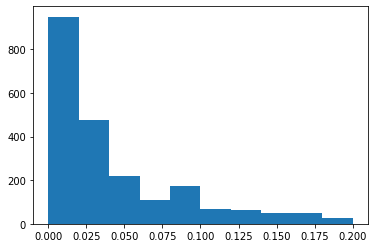

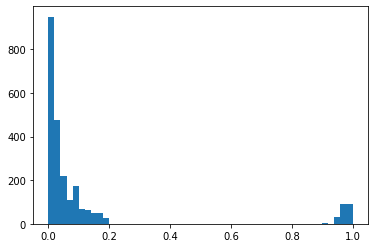

Histogram of test_metric_COVERAGE_ITEM_HIT_cut_50


In [7]:
metric = 'test_metric_COVERAGE_ITEM_HIT_cut_50'
results_notna = results[results[metric].notna()]

plt.hist(results_notna[metric], range=[0,0.2])
plt.show()
plt.hist(results_notna[metric], range=[0,1], bins=50)
plt.show()
print('Histogram of ' + metric)



In [8]:
algs = results_notna['alg_name']
datasets = results_notna['dataset_name']
unique_algs = []
for alg in algs:
    if alg not in unique_algs:
        unique_algs.append(alg)
unique_datasets = []
for dataset in datasets:
    if dataset not in unique_datasets:
        unique_datasets.append(dataset)

print(unique_datasets)
print()
print(unique_algs)

['EpinionsReader', 'Movielens100KReader', 'FrappeReader', 'AnimeReader', 'FilmTrustReader', 'Jester2Reader', 'MarketBiasAmazonReader', 'MarketBiasModClothReader', 'CiaoDVDReader', 'Movielens20MReader', 'WikilensReader', 'MovieTweetingsReader', 'LastFMReader', 'Movielens10MReader']

['ItemKNNCF_euclidean', 'ItemKNNCF_dice', 'ItemKNNCF_cosine', 'ItemKNNCF_asymmetric', 'UserKNNCF_asymmetric', 'P3alphaRecommender', 'CoClustering', 'Random', 'ItemKNNCF_jaccard', 'EASE_R_Recommender', 'ItemKNNCF_tversky', 'PureSVDRecommender', 'RP3betaRecommender', 'SLIMElasticNetRecommender', 'GlobalEffects', 'UserKNNCF_dice', 'UserKNNCF_euclidean', 'DELF_EF_RecommenderWrapper', 'UserKNNCF_tversky', 'UserKNNCF_cosine', 'SlopeOne', 'Mult_VAE_RecommenderWrapper', 'UserKNNCF_jaccard', 'TopPop', 'NMFRecommender', 'IALSRecommender']


## For each dataset, print out the top three algorithms

In [9]:
for dataset in unique_datasets:
    dataset_results = results_notna.loc[results_notna['dataset_name'] == dataset]
    #print(dataset_results[['alg_name', metric]])
    dataset_results = dataset_results.sort_values(by=[metric], ascending=False)
    dataset_results = dataset_results.reset_index()
    #print(dataset_results[['alg_name', metric]])
    top_3_algs = [dataset_results.sort_values(by=[metric]).loc[i]['alg_name'] for i in range(3)]
    print(dataset, '\n', top_3_algs)

EpinionsReader 
 ['ItemKNNCF_dice', 'ItemKNNCF_jaccard', 'ItemKNNCF_tversky']
Movielens100KReader 
 ['ItemKNNCF_asymmetric', 'UserKNNCF_cosine', 'ItemKNNCF_asymmetric']
FrappeReader 
 ['ItemKNNCF_tversky', 'ItemKNNCF_asymmetric', 'ItemKNNCF_asymmetric']
AnimeReader 
 ['ItemKNNCF_asymmetric', 'ItemKNNCF_asymmetric', 'ItemKNNCF_asymmetric']
FilmTrustReader 
 ['ItemKNNCF_cosine', 'ItemKNNCF_cosine', 'UserKNNCF_asymmetric']
Jester2Reader 
 ['ItemKNNCF_asymmetric', 'ItemKNNCF_asymmetric', 'ItemKNNCF_asymmetric']
MarketBiasAmazonReader 
 ['P3alphaRecommender', 'P3alphaRecommender', 'ItemKNNCF_asymmetric']
MarketBiasModClothReader 
 ['UserKNNCF_asymmetric', 'ItemKNNCF_euclidean', 'ItemKNNCF_asymmetric']
CiaoDVDReader 
 ['ItemKNNCF_asymmetric', 'ItemKNNCF_asymmetric', 'ItemKNNCF_asymmetric']
Movielens20MReader 
 ['ItemKNNCF_cosine', 'ItemKNNCF_cosine', 'ItemKNNCF_tversky']
WikilensReader 
 ['ItemKNNCF_asymmetric', 'ItemKNNCF_asymmetric', 'ItemKNNCF_asymmetric']
MovieTweetingsReader 
 ['ItemKNN

In [10]:
# todo: 
# create features such num users, num items, num iterations, and other statistics
# for each algorithm, predict the metric based on dataset features